<a href="https://colab.research.google.com/github/apridosimarmata/proyek-pembelajaran-mesin/blob/main/Project_PM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
url = 'https://raw.githubusercontent.com/apridosimarmata/proyek-pembelajaran-mesin/main/cafe_data.csv'
data = pd.read_csv(url)
data.head()


,Date,Rate,Category
0,4/1/2010 13:15,50.0,BEVERAGE
1,4/1/2010 13:15,100.0,BEVERAGE
2,4/1/2010 13:17,40.0,BEVERAGE
3,4/1/2010 13:19,50.0,BEVERAGE
4,4/1/2010 1:20,45.0,BEVERAGE


In [ ]:
data['Code'] = LE.fit_transform(data['Category'])
data['Date'] = data['Date'].str.split(' ')
data['Date'] = [ int(l[1].split(':')[0]) for l in data['Date']]
data = data.rename(columns={'Date': 'Hour'})
data['Code'] = LE.fit_transform(data['Category'])

In [ ]:
cols = list(data.columns.values)
cols.pop(cols.index('Hour'))
data = data[cols+['Hour']]

cols = list(data.columns.values)
cols.pop(cols.index('Rate'))
data = data[cols+['Rate']]

cols = list(data.columns.values)
cols.pop(cols.index('Code'))
data = data[cols+['Code']]
data.head()

,Category,Hour,Rate,Code
0,BEVERAGE,13,50.0,0
1,BEVERAGE,13,100.0,0
2,BEVERAGE,13,40.0,0
3,BEVERAGE,13,50.0,0
4,BEVERAGE,1,45.0,0


In [ ]:
data['Hour'].min()

0

In [ ]:
data['Hour'].max()

23

In [ ]:
X = data.iloc[:,1:4].values

In [ ]:
X

array([[ 13.,  50.,   0.],
       [ 13., 100.,   0.],
       [ 13.,  40.,   0.],
       ...,
       [  1., 150.,   2.],
       [ 23., 150.,   2.],
       [  0., 700.,   2.]])

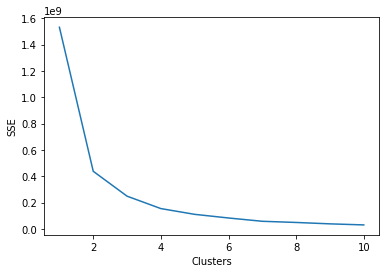

In [ ]:
#elbow method
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)

print(y)

[1 1 1 ... 1 1 0]


In [ ]:
data['cluster'] = y

In [ ]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]

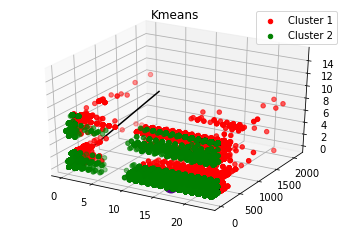

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.Hour, data1.Rate, data1.Code, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.Hour, data2.Rate, data2.Code, c='green', label = 'Cluster 2')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()